### 1 - Module Importieren

In [1]:
# Standard Module
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Statistische Module
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [3]:
# Module für Visualisierungen
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from matplotlib import colors
from matplotlib.pyplot import plot

style.use("seaborn-whitegrid")
%matplotlib inline
%config InlineBackend.figure_format = "retina"

### 2 - Daten Importieren

In [4]:
# CSV Datei importieren
df = pd.read_csv(os.getcwd() + "/insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### 3 - Daten Transformieren

**Unabhängige Variablen:**
- `age`       : Alter in Jahren
- `bmi`       : Body-Mass-Index
- `children`  : Anzahl Kinder
- `sex`       : Geschlecht (1 = Männlich; 0 = Weiblich)
- `smoker`    : Raucher (1 = Ja; 0 = Nein)
- `region_nw` : Person aus Region Nordwest (1 = Ja; 0 = Nein)
- `region_se` : Person aus Region Südost (1 = Ja; 0 = Nein)
- `region_sw` : Person aus Region Südwest (1 = Ja; 0 = Nein)

**Abhängige Variable:**
- `charges`   : Versicherungsgebühren (USD)

In [5]:
# Kategoriale Daten in Dummy-Variablen überführen
dfc = pd.get_dummies(df, drop_first = True, dtype = "int64")
dfc = dfc.rename(columns = {"sex_male":"sex",
                            "smoker_yes":"smoker",
                            "region_northwest":"region_nw",
                            "region_southeast":"region_se",
                            "region_southwest":"region_sw"})

# Numerische Daten runden
dfc["bmi"] = dfc["bmi"].round(2)
dfc["charges"] = dfc["charges"].round(2)
dfc.head(10)

,age,bmi,children,charges,sex,smoker,region_nw,region_se,region_sw
0,19,27.90,0,16884.92,0,1,0,0,1
1,18,33.77,1,1725.55,1,0,0,1,0
2,28,33.00,3,4449.46,1,0,0,1,0
3,33,22.70,0,21984.47,1,0,1,0,0
4,32,28.88,0,3866.86,1,0,1,0,0
5,31,25.74,0,3756.62,0,0,0,1,0
6,46,33.44,1,8240.59,0,0,0,1,0
7,37,27.74,3,7281.51,0,0,1,0,0
8,37,29.83,2,6406.41,1,0,0,0,0
9,60,25.84,0,28923.14,0,0,1,0,0


In [6]:
dfc.to_csv("insurance_transformed.csv", index = False)

### 4 - Deskriptive Statistiken & Analyse

In [7]:
# Allgemeine Informationen über Datensatz
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   charges    1338 non-null   float64
 4   sex        1338 non-null   int64  
 5   smoker     1338 non-null   int64  
 6   region_nw  1338 non-null   int64  
 7   region_se  1338 non-null   int64  
 8   region_sw  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [8]:
# Deskriptive Statistiken
dfc.describe().round(2)

,age,bmi,children,charges,sex,smoker,region_nw,region_se,region_sw
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42,0.51,0.2,0.24,0.27,0.24
std,14.05,6.10,1.21,12110.01,0.50,0.4,0.43,0.45,0.43
min,18.00,15.96,0.00,1121.87,0.00,0.0,0.00,0.00,0.00
25%,27.00,26.30,0.00,4740.29,0.00,0.0,0.00,0.00,0.00
50%,39.00,30.40,1.00,9382.03,1.00,0.0,0.00,0.00,0.00
75%,51.00,34.69,2.00,16639.92,1.00,0.0,0.00,1.00,0.00
max,64.00,53.13,5.00,63770.43,1.00,1.0,1.00,1.00,1.00


In [9]:
# Multikollinearität überprüfen
X_vif = add_constant(dfc)
pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], 
          index = X_vif.columns)

const        39.433704
age           1.373346
bmi           1.223739
children      1.013005
charges       4.014629
sex           1.009019
smoker        3.549454
region_nw     1.519452
region_se     1.658047
region_sw     1.534055
dtype: float64

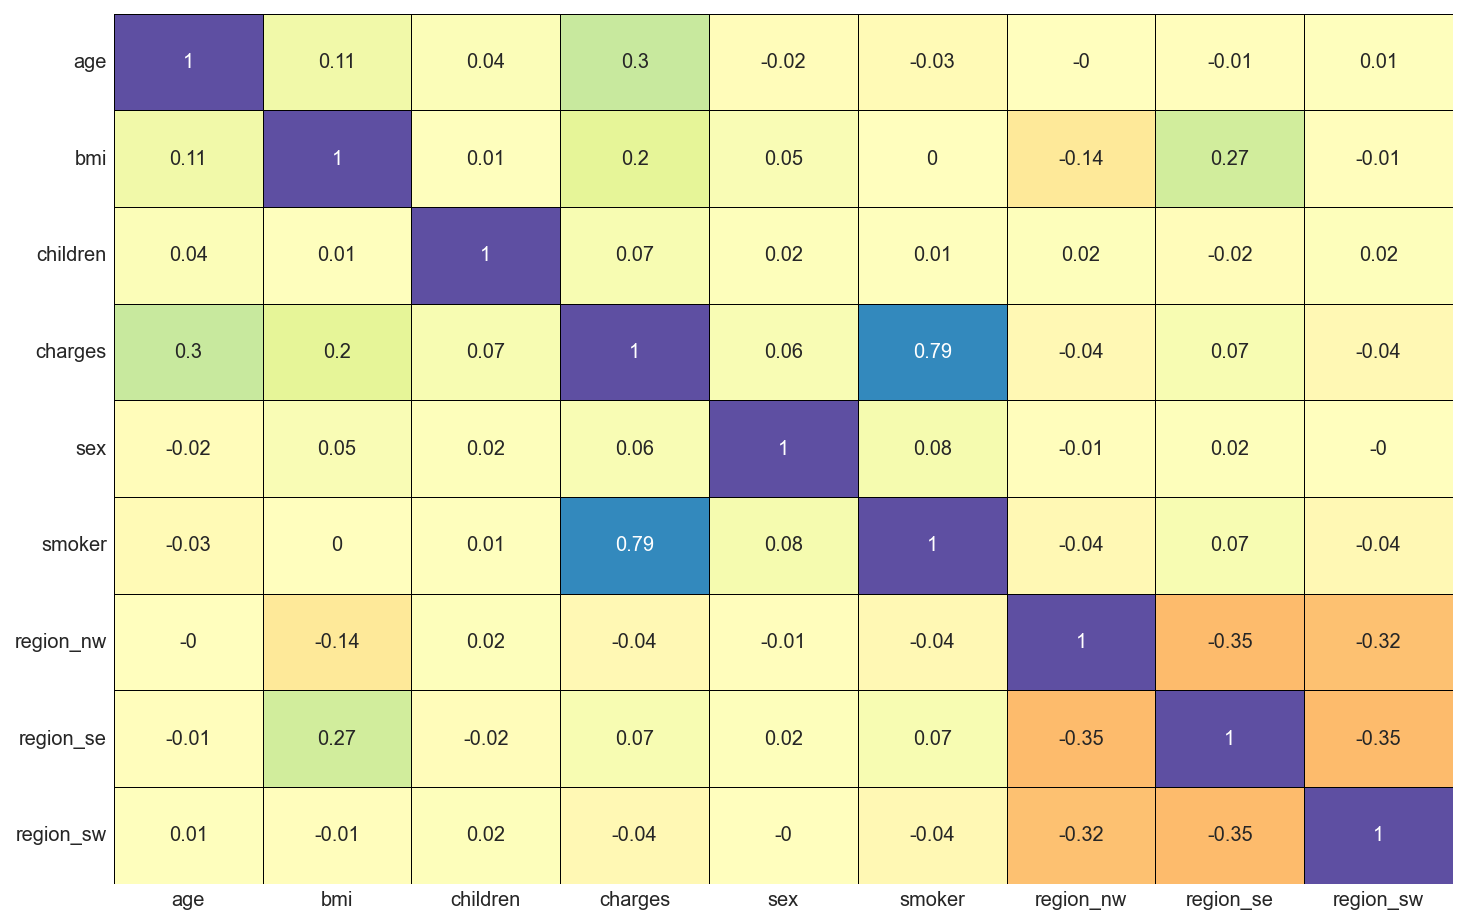

In [10]:
# Korrelationsmatrix
corrmat = dfc.corr().round(2)
plt.figure(figsize = (12, 8))  
sns.heatmap(corrmat, annot = True, cmap = "Spectral", center = 0, 
            cbar = False, linewidth = 0.5, linecolor = "black")
plt.yticks(rotation = 0);

In [11]:
# Vorbereitung bedingte Wahrscheinlichkeitsverteilungen
# BMI Werte gruppieren
dfc_cond = dfc.copy()
dfc_cond["bmi_category"] = 0
for i, row in dfc_cond.iterrows():
    # Übergewicht
    if dfc_cond.at[i, "bmi"] >= 30:
        dfc_cond.at[i, "bmi_category"] = 1
    # Untergewicht
    elif dfc_cond.at[i, "bmi"] <= 18.5:
        dfc_cond.at[i, "bmi_category"] = 2
    # Normalgewicht
    else:
        dfc_cond.at[i, "bmi_category"] = 3

# Altersgruppen erstellen
dfc_cond["age_group"] = 0
for i, row in dfc_cond.iterrows():
    # Altersgruppe 1
    if dfc_cond.at[i, "age"] >= 18 and dfc_cond.at[i, "age"] <= 30:
        dfc_cond.at[i, "age_group"] = 1
    # Altersgruppe 2
    elif dfc_cond.at[i, "age"] > 30 and dfc_cond.at[i, "age"] <= 50:
        dfc_cond.at[i, "age_group"] = 2
    # Altersgruppe 3
    else:
        dfc_cond.at[i, "age_group"] = 3

# Funktion für Visualisierung der Verteilungen
def kde(feature):
    plt.figure(figsize = (12, 6))
    sns.kdeplot(data = dfc_cond, x = "charges", hue = feature, palette = "crest", 
            fill = True, alpha = 0.7, linewidth = 0, multiple = "stack")
    plt.grid(visible = False)
    plt.xlim([-9000, 75000]);

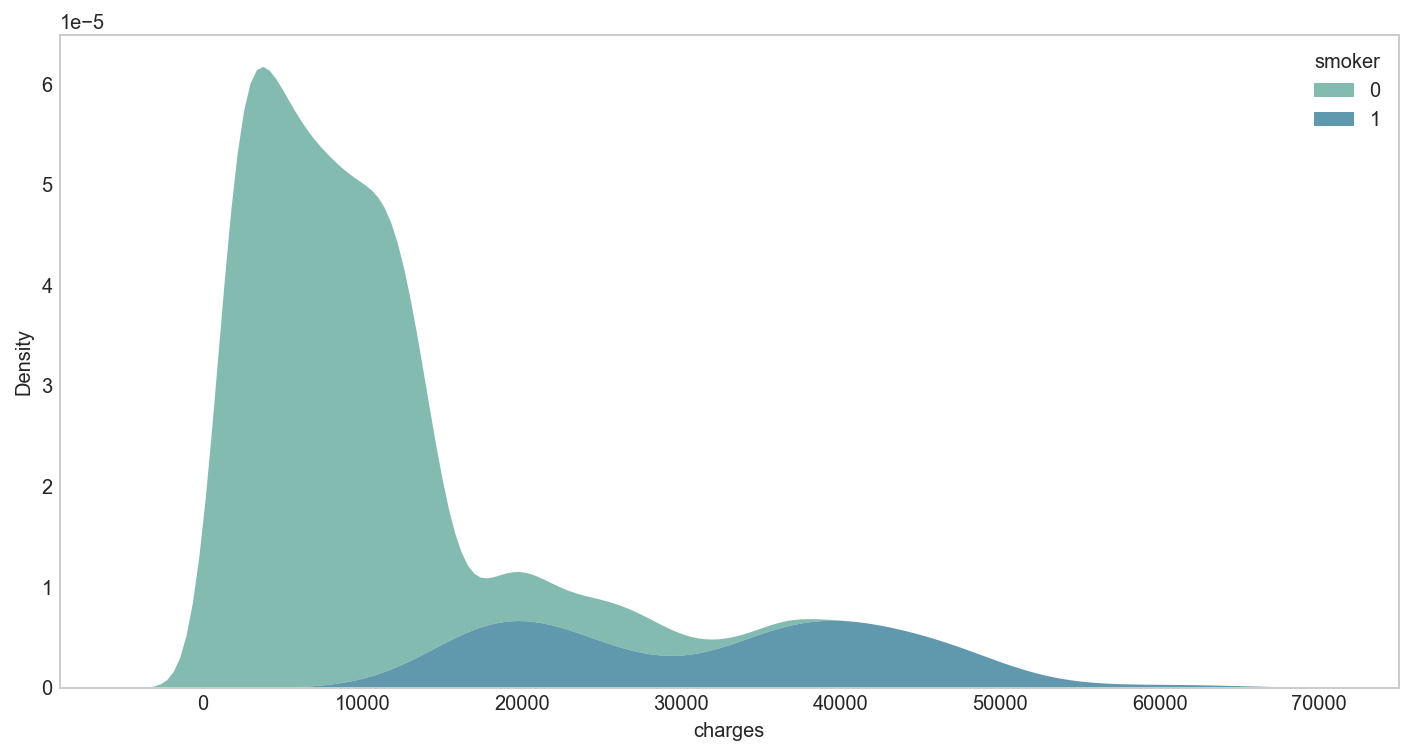

In [12]:
kde("smoker")

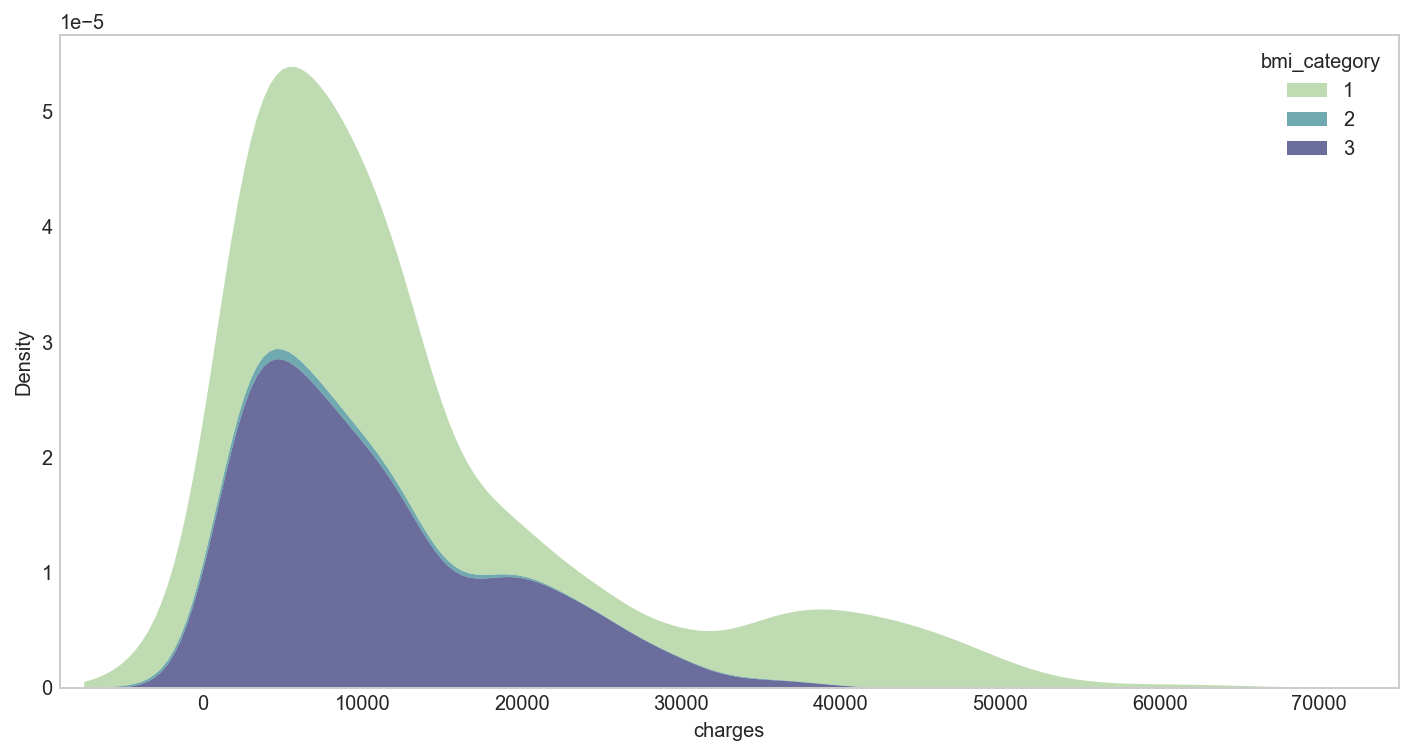

In [13]:
kde("bmi_category")

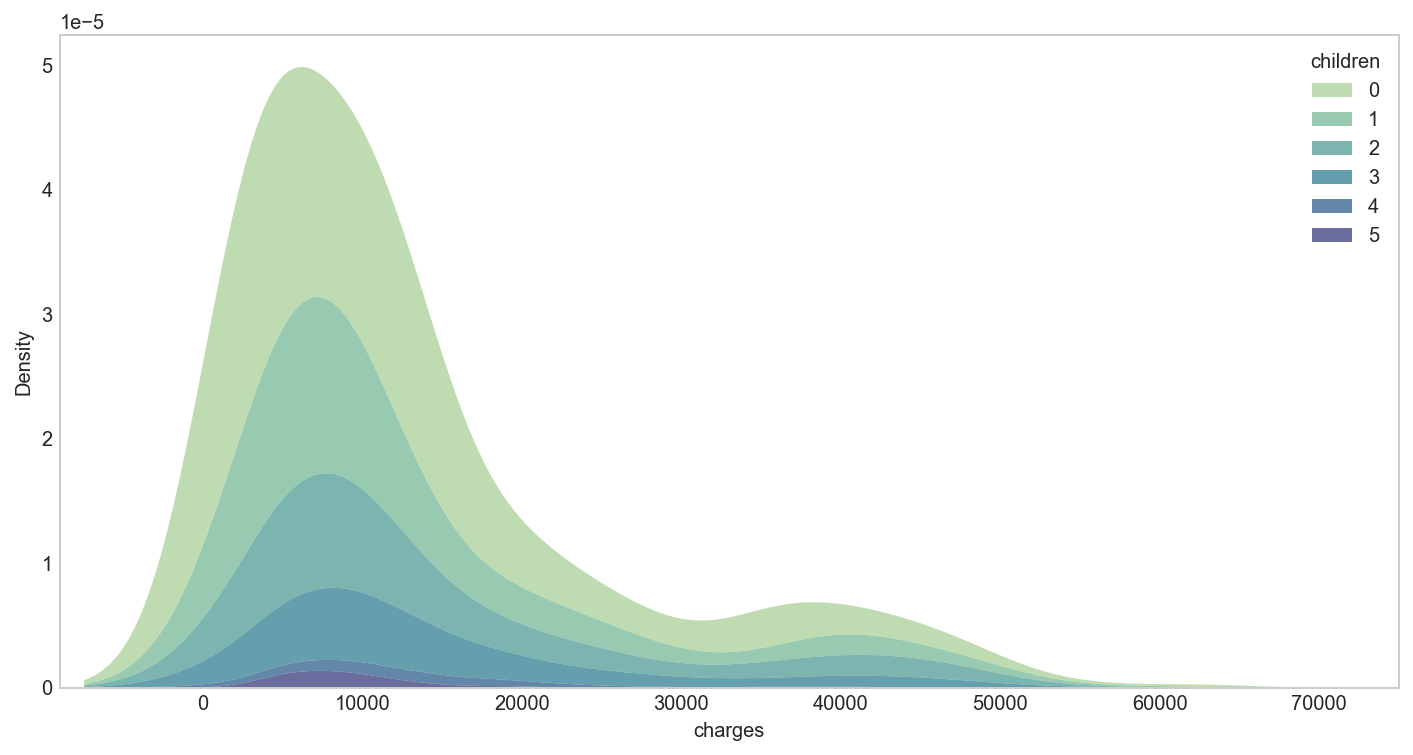

In [14]:
kde("children")

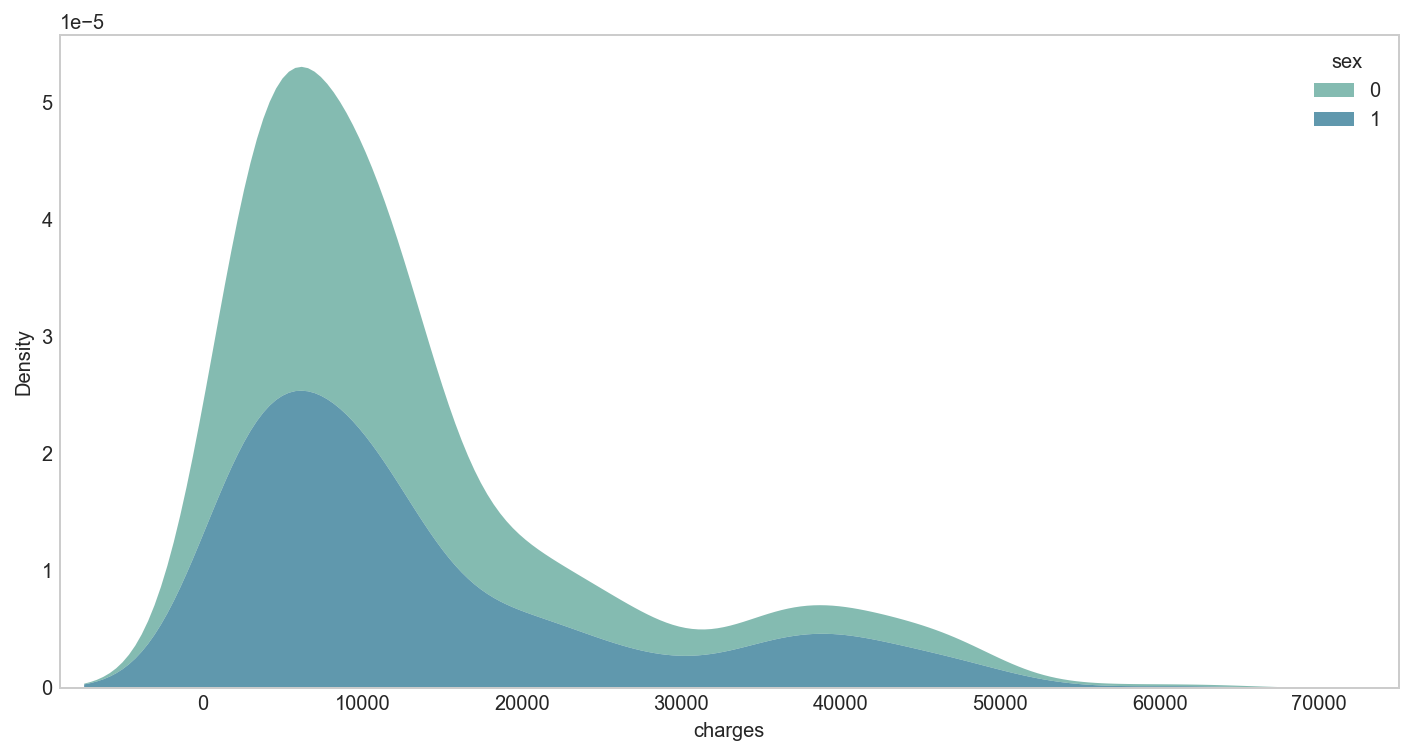

In [15]:
kde("sex")

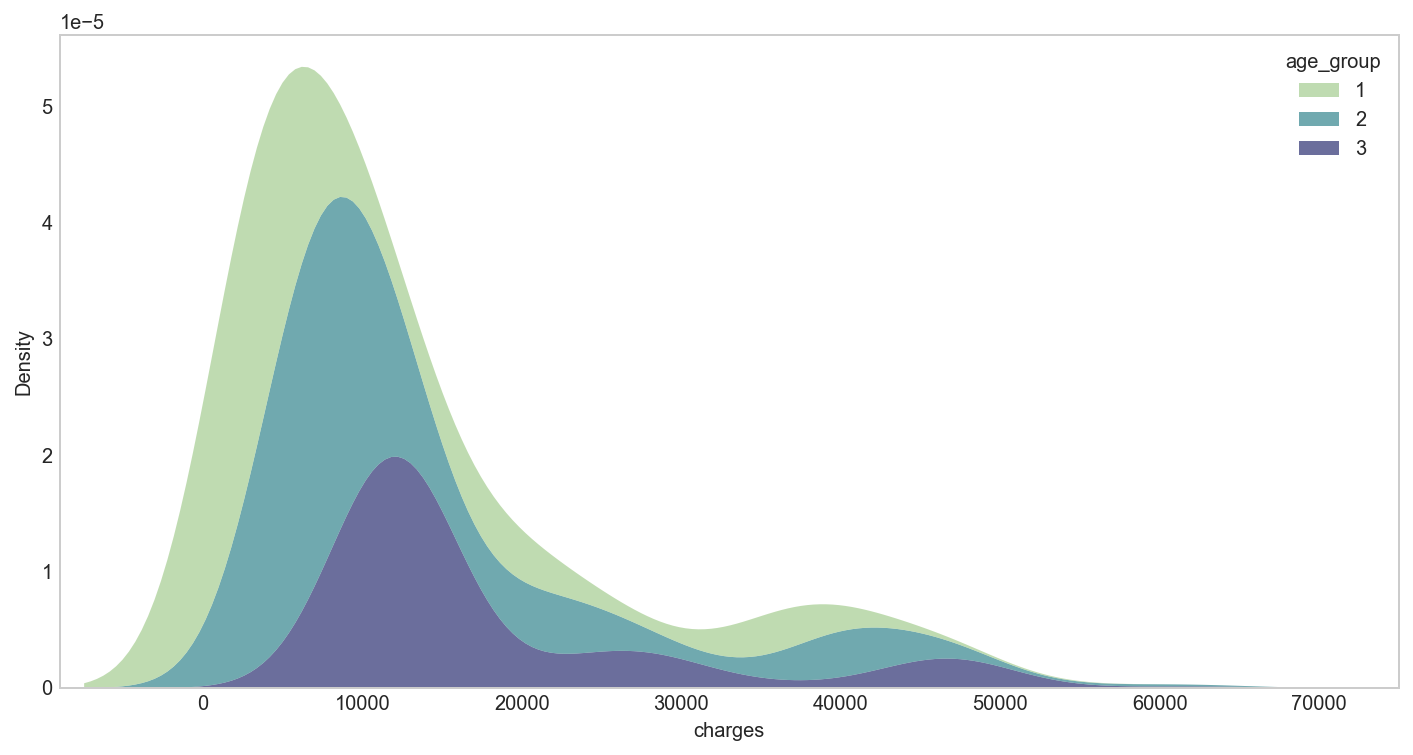

In [16]:
kde("age_group")

### 5 - Lineare Regression & Diagnostik

In [17]:
# Abhängige/Unabhängige Variablen definieren
X = dfc.drop(["charges"], 1)
y = dfc["charges"]

In [18]:
# Regressionsmodell schätzen
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1158.
Date:                Sat, 12 Mar 2022   Prob (F-statistic):                        0.00
Time:                        18:46:15   Log-Likelihood:                         -13618.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1330   BIC:                                  2.729e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
# Normalverteilung der Residuen
# Jarque-Bera Test mit H_0: Residuen sind normalverteilt
print("p-value = " + str(round(sms.jarque_bera(results.resid)[1], 2)))

p-value = 0.0


In [20]:
# Überprüfung Heteroskedastizität
# Goldfeld-Quandt Test mit H_0: Homoskedastizität liegt vor
print("p-value = " + str(round(sms.het_goldfeldquandt(results.resid, results.model.exog)[1], 2)))

p-value = 0.66
